In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import keras
import sequential
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.9)

# tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True))

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
data=fashion_mnist.load_data()

In [5]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
X_train=X_train/255
X_test=X_test/255

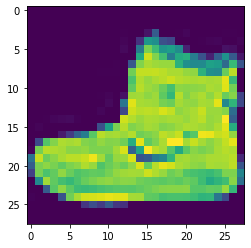

In [8]:
pl.imshow(X_train[0])

In [9]:
X_train=X_train.reshape(-1,28*28)

In [10]:
X_test=X_test.reshape(-1,28*28)

In [69]:
model=tf.keras.models.Sequential()

In [70]:
# Input layer
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [71]:
# Hidden Layer with 20 perent neurons preventing from learning
# to prevent overfitting
model.add(tf.keras.layers.Dropout(0.2))

In [72]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [73]:
model.add(tf.keras.layers.Dropout(0.2))

In [74]:
# Output Layer
# Softmax gives probablity in output
# here 10 is we have 10 classes shoes,shirt,etc
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [75]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [77]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5754 - sparse_categorical_accuracy: 0.7925
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4209 - sparse_categorical_accuracy: 0.8484
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3802 - sparse_categorical_accuracy: 0.8630
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3566 - sparse_categorical_accuracy: 0.8700
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8757
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8798
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3168 - sparse_categorical_accuracy: 0.8827
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3092 - sparse_categorical_accuracy: 0.8870
Epoch 9/100
1875/1875 [=

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1860 - sparse_categorical_accuracy: 0.9301
Epoch 68/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1846 - sparse_categorical_accuracy: 0.9316
Epoch 69/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1851 - sparse_categorical_accuracy: 0.9309
Epoch 70/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1856 - sparse_categorical_accuracy: 0.9301
Epoch 71/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1843 - sparse_categorical_accuracy: 0.9316
Epoch 72/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1823 - sparse_categorical_accuracy: 0.9324
Epoch 73/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1825 - sparse_categorical_accuracy: 0.9314
Epoch 74/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1835 - sparse_categorical_accuracy: 0.9315
Epoch 75/100
1875/1875 [=====

In [78]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3642 - sparse_categorical_accuracy: 0.8970


In [79]:
test_loss,test_accuracy

(0.36415228247642517, 0.8970000147819519)

In [59]:
classifier=Sequential()

In [60]:
classifier.add(Dense(input_dim=784,activation='relu',output_dim=128,kernel_initializer='uniform'))

C:\Users\rissu\anaconda3\envs\Tensor_flow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", kernel_initializer="uniform", units=128)`
  """Entry point for launching an IPython kernel.


In [61]:
classifier.add(keras.layers.Dropout(0.2,))

In [62]:
classifier.add(Dense(output_dim=10,kernel_initializer='uniform',
                    activation='softmax'))

C:\Users\rissu\anaconda3\envs\Tensor_flow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="softmax", units=10)`
  


In [63]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [64]:
classifier.fit(X_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.5506 - sparse_categorical_accuracy: 0.8044
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.4036 - sparse_categorical_accuracy: 0.8532
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3714 - sparse_categorical_accuracy: 0.8639
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3484 - sparse_categorical_accuracy: 0.8722
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3326 - sparse_categorical_accuracy: 0.8759
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3171 - sparse_categorical_accuracy: 0.8832
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3100 - sparse_categorical_accuracy: 0.8861
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3012 - sparse_categorical_accuracy: 0.8883
Epoch 9/

In [65]:
error,accurarcy=classifier.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 40us/step


In [66]:
error,accurarcy

(0.3446231386244297, 0.8847000002861023)